In [2]:
# Used to create a neural network that will be trained using the MNIST dataset
import keras as kr
# used to Store the bytes files in arrays that can be easily fed into the neural network
import numpy as np
# plotting the data on graphs for visualisation
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Decompressing the datasets from MNIST

In [ ]:
# Import mnist dataset
# Dataset used by the neural network
(train_img, train_lbl), (test_img, test_lbl) = kr.datasets.mnist.load_data()

# Reshaping data using normalisation
# Original data is [0-255]. 
# Scale it to range [0,1].
train_img = train_img.reshape(60000, 784)
test_img = test_img.reshape(10000, 784)

# Converting the images to float32 to allow for better division
train_img = train_img.astype('float32')
test_img = test_img.astype('float32')

# Dividing the images by 255 to scale the range to [0,1]
train_img = train_img/255
test_img = test_img/255 

# mnist dataset contains 10 different digits
# Therefore vector size is 10
# --> 0 1 2 3 4 5 6 7 8 9 
digits= 10

# Passed the labels to one hot vecotrs with a vector size of 10
train_lbl = kr.utils.np_utils.to_categorical(train_lbl, digits)
test_lbl = kr.utils.np_utils.to_categorical(test_lbl, digits)

# The third index in the array should have the 1
print("One hot vector at index 0 of training labels ", train_lbl[0])

# Displaying images & labels from Datasets

One hot Vector of training label at index 5: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


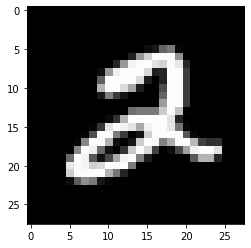

In [46]:
# displaying the training images and labels to show they are accessible
# Showing 5th entry in MNIST
image= train_img[5]
# specialized function for showing images based on np arrays
plt.imshow(image.reshape(28,28), cmap="gray")
print("One hot Vector of training label at index 5:", train_lbl[5])

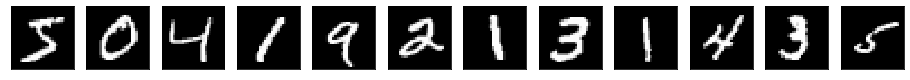

In [30]:
# Plotting examples of the data in the set
plt.figure(1, figsize=(16,5))
# For loop that will iterate 12 times
for i in range(12):
    plt.subplot(1,12,i+1)
    plt.imshow(train_img[i].reshape(28,28), cmap="gray")
    # removing the labels from the graph so the images are not obstructed
    plt.xticks([])
    plt.yticks([])

# Making The Nueral Network

In [37]:
# Creating Nueral Network using import model from Keras
model = kr.models.Sequential()
# Input Layer (First Layer)
# Add initial layer to Nueral Network to which this layer recieves inputs

# 1st layer uses linear activation to get inputs before moving ojnto next layer
model.add(kr.layers.Dense(250, activation = "relu", input_shape = (784,)))

# Simplification (2nd layer)
# activation="relu" means the output will be a 1 for positive result, else 0
model.add(kr.layers.Dense(500, activation = "relu"))

# Output layer (3rd layer)
# Softmax is used to map output to a [0,1] range,
# allowing output to be interpreted as a probability
model.add(kr.layers.Dense(10, activation="softmax"))

print("Added Layers to the Model")
print("Compiling...")
# Building the Neurel Network
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print("Compiled!")

Added Layers to the Model
Compiling...
Compiled!


In [38]:
print("Model Summary")
model.summary()

Model Summary
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_8 (Dense)              (None, 500)               125500    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5010      
Total params: 326,760
Trainable params: 326,760
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Training the model
# the inputs are the images and the outputs are the labels of the training set
# an epoch is how many cycles through the inputs and outputs the neureal network will compare
model.fit(inputs, outputs, epochs=10, batch_size=256, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.3140 - accuracy: 0.9114
Epoch 2/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.1128 - accuracy: 0.9664
Epoch 3/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0721 - accuracy: 0.9783
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0521 - accuracy: 0.9841
Epoch 5/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0370 - accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0279 - accuracy: 0.9913
Epoch 7/10
60000/60000 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.99 - 2s 30us/step - loss: 0.0219 - accuracy: 0.9934
Epoch 8/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0168 - accuracy: 0.9947
Epoch 9/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0118 - accuracy: 0.9965
Epoch 10/10
6

In [42]:
# Calculate and display the loss and model accuracy 
# adpated from: https://machinelearningmastery.com/save-load-keras-deep-learning-models/
loss, accuracy = model.evaluate(test_img, test_lbl)
score = model.evaluate(test_img, test_lbl)
print(loss, accuracy)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

10000/10000 [==============================] - 0s 34us/step
0.08039408195602227 0.9789000153541565
accuracy: 97.89%


# Saving The Model

In [45]:
model.save('trained_model.h5')
print("Model Saved.")

Model Saved.
